In [86]:
indir = 'D:\\download\\nangluong-20210527T102136Z-001\\nangluong\\CMD\\skeleton'

In [87]:
import os,cv2,numpy as np,matplotlib.pyplot as plt
from tqdm import tqdm

In [110]:
all_seq = []
titles = []
#print(os.walk(indir))
for root,_,files in os.walk(indir):
    for f in tqdm(files):
        if '.txt' in f:
            seq = []
            #print (root)
            lines = open(root+'/'+f,'rt').read().strip().split('\n')
            #print(len(lines))
            #try:
            for i,l in enumerate(lines):
                    if i%2==1:
                        continue
                    timestamp, x, frame_index, person_index=l.strip().split(' ')
                    skeleton_data = lines[i+1]
                    skeleton_data=skeleton_data.strip().split(' ')
                    #print(type(skeleton_data))
                    #print(skeleton_data)
                    #floor_equation=lines[i+1]
                    timestamp = int(timestamp)
                    frame_index = int(frame_index)
                    person_index = int(person_index)
                    skeleton_data = np.array([ float(v) for v in skeleton_data[:-4]])
                    floor_equation  = np.array([ float(v) for v in skeleton_data[-4:]])                                     
                    seq.append([timestamp,person_index,frame_index,skeleton_data,floor_equation])
            #except:
            #    pass
            #print(i)
            all_seq=seq
            titles.append(f)
            #print(skeleton_data.shape)
            print(len(all_seq))

        

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.67it/s]

5114


In [111]:
actions_list = {}
lines = open('D:\\download\\nangluong-20210527T102136Z-001\\nangluong\\CMD\\action_list.txt','rt').read().strip().split('\n')[1:]
#print (lines)
for l in lines:
    arr = l.strip().split(',')
    actions_list[int(arr[0])] = arr[1]
print (actions_list)

{1: 'Start', 2: 'Stop', 3: 'Slow', 4: 'Fast', 5: 'Done', 6: 'Follow_me', 7: 'Lift', 8: 'Home', 9: 'Look', 10: 'Ok', 11: 'Help', 12: 'Again', 13: 'Pick_part', 14: 'Deposit_part'}


In [112]:
import re

annotations = []
lines = open('D:\\download\\nangluong-20210527T102136Z-001\\nangluong\\CMD\\annotation.csv','rt').read().strip().split('\n')
#print(lines)
for l in lines:
    #try:
        if l==',,':
            continue
        #l2 = re.sub(r'[^\x00-\x7f]',r'', l)  #remove non ascii chars
        
        temp, start_frame, stop_frame = [v for v in l.strip().split(',')]
        action_id=int(temp[1:3])
        subject_id=int(temp[4:6])
        kinect_id=int(temp[8:11])
        annotations.append([action_id,subject_id,kinect_id,int(start_frame),int(stop_frame)])
    #except:
    #    pass
        
print(annotations)

[[1, 1, 1, 244, 448], [2, 1, 1, 550, 727], [3, 1, 1, 882, 1100], [4, 1, 1, 1104, 1340], [5, 1, 1, 1630, 1804], [6, 1, 1, 1856, 2227], [7, 1, 1, 2298, 2489], [8, 1, 1, 2530, 2658], [9, 1, 1, 2673, 2823], [10, 1, 1, 2824, 3103], [11, 1, 1, 3104, 3527], [12, 1, 1, 3616, 3791], [13, 1, 1, 3815, 3938], [14, 1, 1, 3815, 3938]]


In [122]:
print(len(all_seq))

5114


In [144]:
import math
def Euclid(a,b,c,d):
    return math.sqrt((a-c)*(a-c)+(b-d)*(b-d))
Euclid(1,1,3,4)

3.605551275463989

13


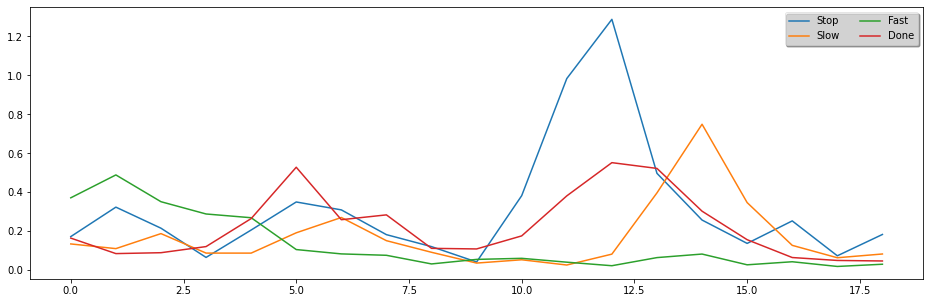

In [169]:
subject_test = 1
kinect_test = 1
actions = [2]
n_skels = 5
vis_seq = []
# get data
for action in range(14):
    for [action_id,subject_id,kinect_id,start_frame,stop_frame] in annotations:
        #print(action_id,subject_id,kinect_id,start_frame,stop_frame)
        if action_id == action+1 and subject_id == subject_test and kinect_test == kinect_id:

            seq = []
            for frame in all_seq:
                
                timestamp=frame[0]
                person_index=frame[1]
                frame_index=frame[2]
                #print(type(frame_index))
                #print(frame_index)
                #print(frame)
                skeleton_data=frame[3]
                floor_equation=frame[4]
                if int(frame_index) >= start_frame and int(frame_index)<=stop_frame:
                        seq.append(skeleton_data)
            vis_seq.append(seq)
            break

results=[] # tổng hợp của tất cả hoạt động 
#1->13
for i in range(1,len(vis_seq)):
    frames=[]
    for j in range(0,100):
        if(j%5==0):
            frames.append(vis_seq[i][j])

    result=[] # euclid list in a action
    for frame_num in range(0,len(frames)-1):
        frame=frames[frame_num].reshape(20,3)
        next_frame=frames[frame_num+1].reshape(20,3)
        #compute euclid for each joints in a frame
        #print(next_frame)
        euclid=0
        for joint in range(20):
            #print(frame[joint][0])
            euclid+=Euclid(frame[joint][0],frame[joint][1],next_frame[joint][0],next_frame[joint][1])
        result.append(euclid)
    results.append(result)
print(len(results))

#for i in range(0,len(kc)-19):
#    count=0
#    for j in range(0,19):
#        count += kc[i+j]
#    KC.append(count)
#    i=i+1  
fig=plt.figure(figsize=(16,5))
ax = plt.subplot()
t1 = np.arange(0.0, 19, 1)
for n in [ 2,3,4,5]:
    plt.plot(t1, results[n-1], label=actions_list[n])

leg = plt.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


            